In [3]:
import pandas as pd
import itertools
import itertools
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline
#To show all the rows of pandas dataframe
pd.set_option('display.max_rows',None)
df=pd.read_csv(r"C:\Users\dell\Downloads\drug+review+dataset+druglib+com\drugLibTrain_raw.tsv",sep='\t')
df.head()

Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

In [4]:
df.condition.value_counts()

condition
depression                                            236
acne                                                  165
anxiety                                                63
insomnia                                               54
birth control                                          49
high blood pressure                                    42
allergies                                              37
acid reflux                                            33
asthma                                                 33
migraines                                              31
hair loss                                              30
migraine                                               30
hypothyroidism                                         29
add                                                    28
high cholesterol                                       27
adhd                                                   26
fibromyalgia                                           23
hype

In [5]:
df_train = df[
    (df['condition'] == 'birth control') |
    (df['condition'] == 'depression') |
    (df['condition'] == 'high blood pressure') |  # Fix: Added missing quote
    (df['condition'] == 'diabetes')
]


In [6]:
df.shape

(3107, 9)

In [7]:
df_train.shape

(339, 9)

In [17]:
X=df_train.drop(['unamed: 0','urlDrugName','rating','effectiveness','sideEffects','Unnamed: 0'],axis=1,errors='ignore')

In [9]:
df_train['condition'].value_counts()

condition
depression             236
birth control           49
high blood pressure     42
diabetes                12
Name: count, dtype: int64

In [18]:
X.head()

condition                                     benefitsReview  \
7      depression  Although this drug was originally prescribed f...   
12     depression  I found that this drug helps significantly wit...   
34     depression  I have taken antidepressants for many years, a...   
40     depression  relieves depression, helps other things such a...   
50  birth control           No undesired pregnancies, lighter period   

                                    sideEffectsReview  \
7                                               None.   
12  My sides effects were not noticeable and very ...   
34  A little bit of "hyper" feelings.  I take the ...   
40  Sleepy and lack of response to problems.  Took...   
50                                               none   

                                       commentsReview  
7      One a day, taken about an hour before bedtime.  
12  This was prescribes to me for treatment for de...  
34  I suffer chronic depression and the Wellbutrin...  
40  took a seemingly long period of time to become...  
50                                    One pill daily.

In [19]:
#SEGREGATING DATAframe for analyzing indivial condition
X_birth=X[(X['condition'] == 'birth control')]
X_dep=X[(X['condition'] == 'depression')] 
X_bp=X[(X['condition'] == 'high blood pressure') ] # Fix: Added missing quote
X_diab=X[(X['condition'] == 'diabetes')]

Text(0.5, 1.0, 'word cloud for Birth control')

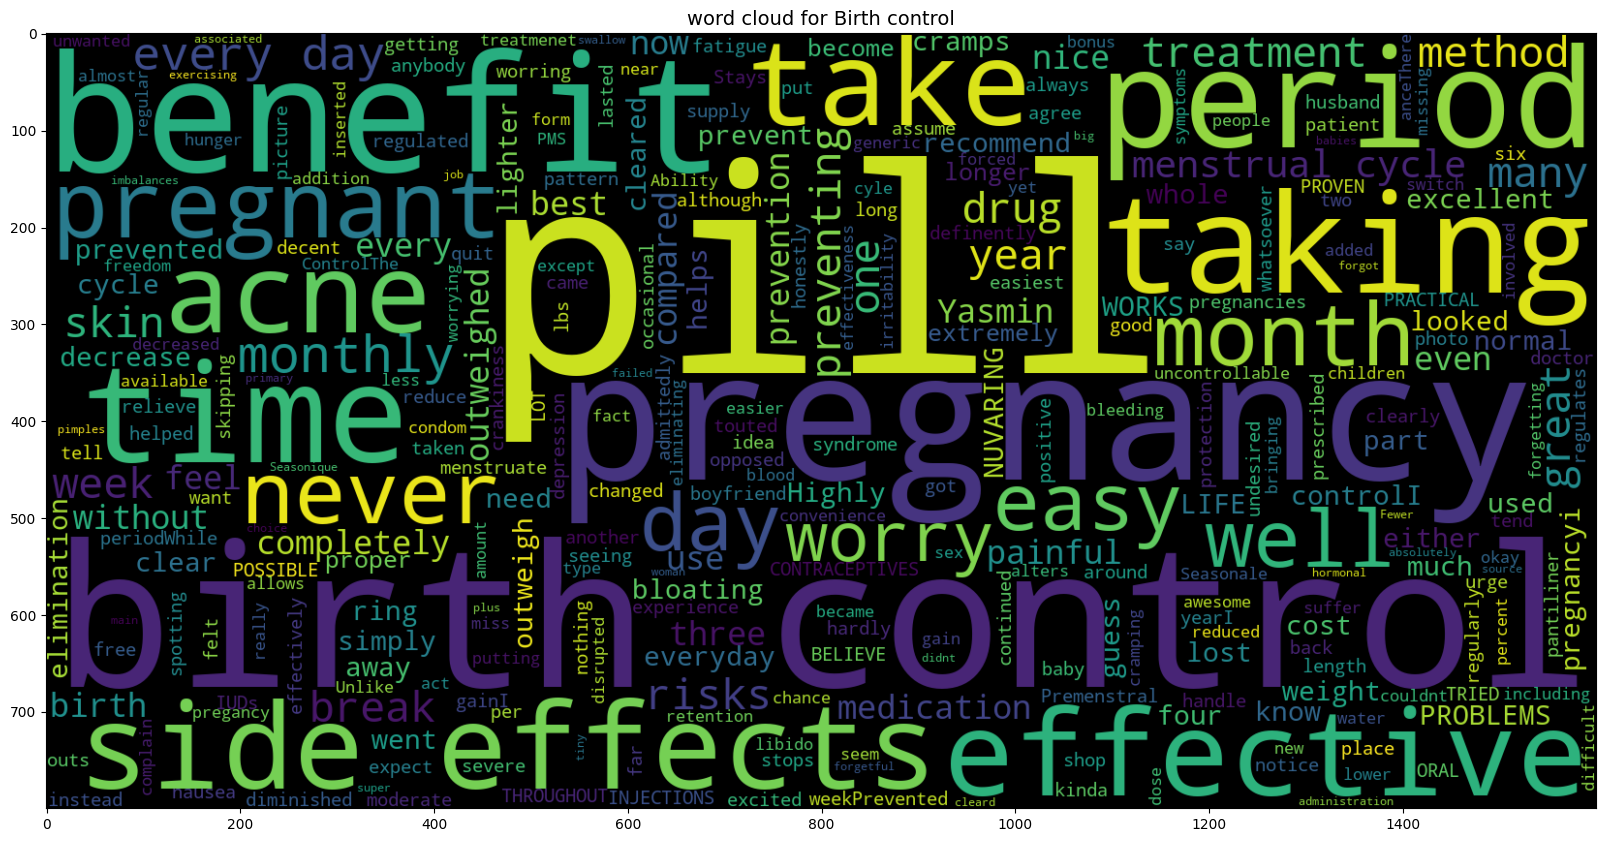

In [35]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600,height=800).generate("".join(X_birth.benefitsReview.dropna().astype(str)))
plt.imshow(wc,interpolation='bilinear')
plt.title('word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'word cloud for depression')

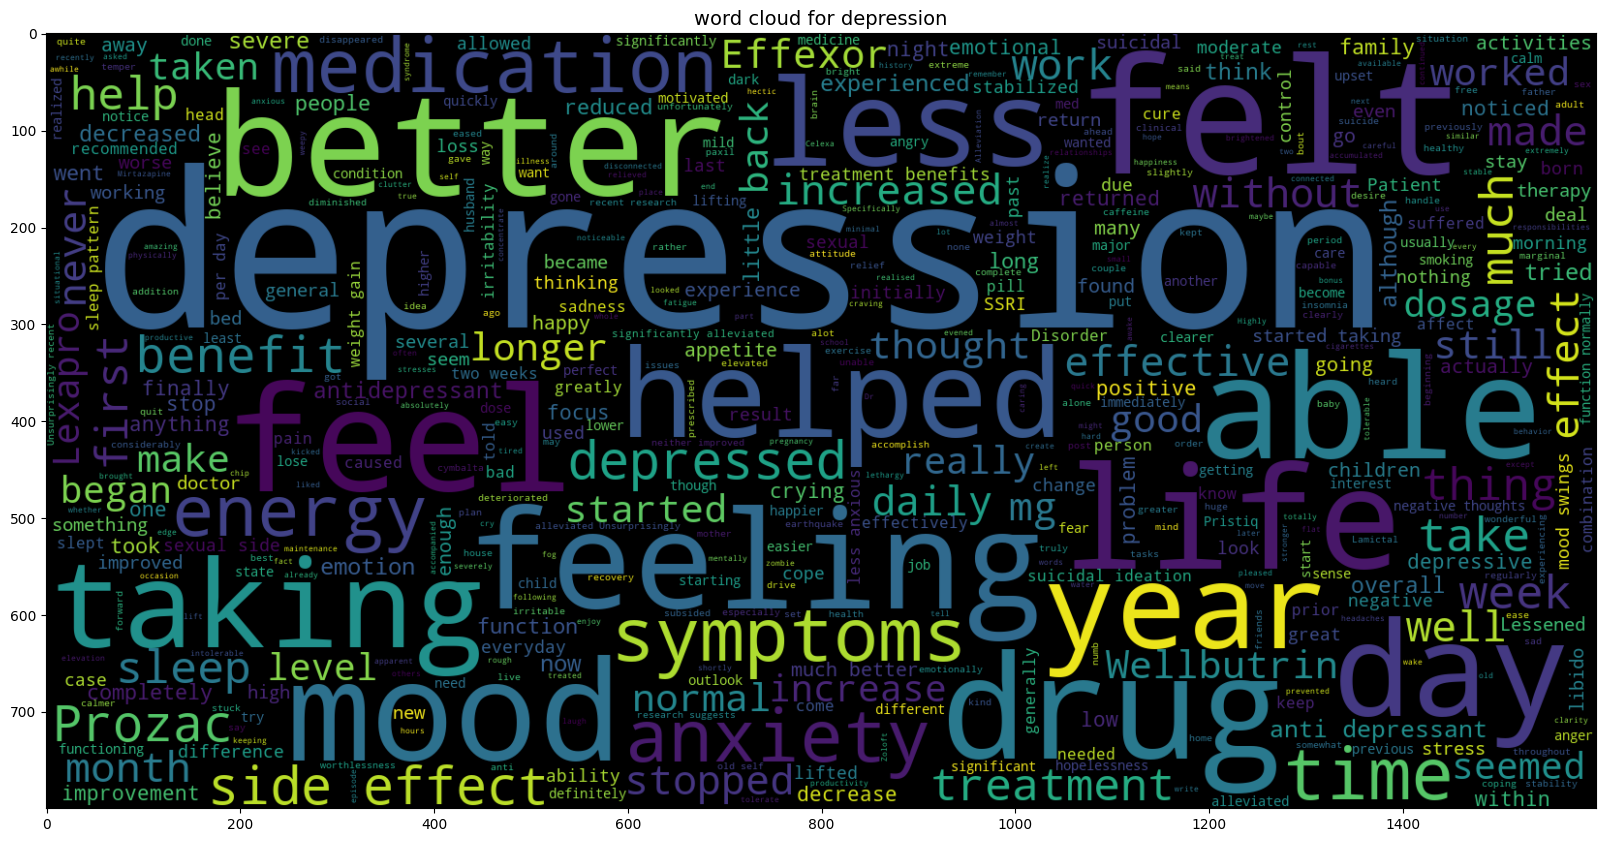

In [38]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600, height=800).generate("".join(X_dep.benefitsReview.dropna().astype(str)))
plt.imshow(wc,interpolation='bilinear')
plt.title('word cloud for depression',fontsize=14)

Text(0.5, 1.0, 'word cloud for High Blood Pressure')

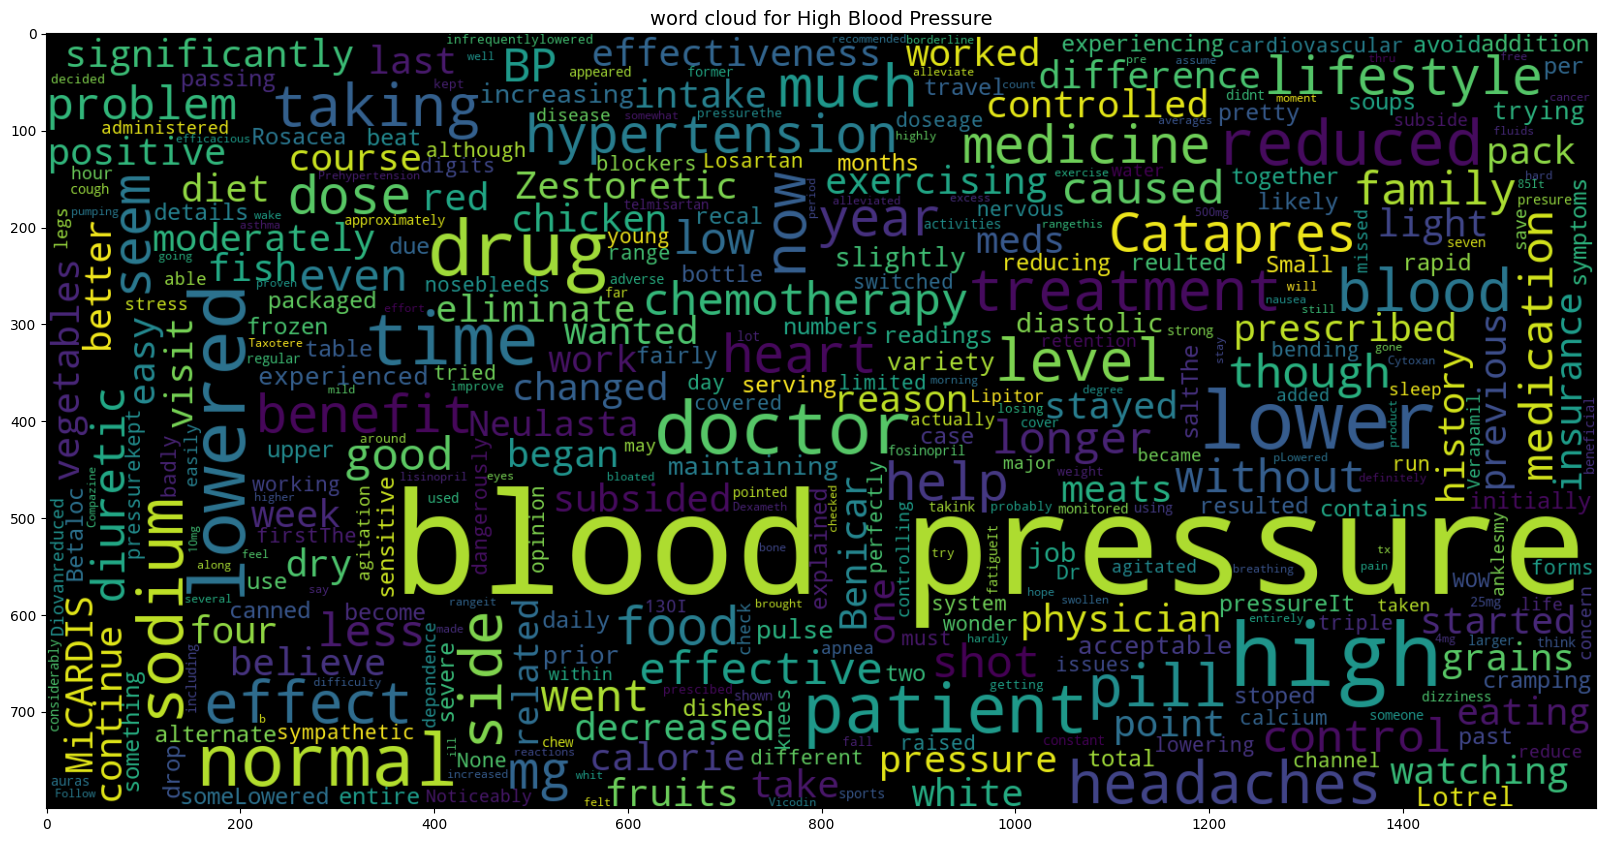

In [39]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600, height=800).generate("".join(X_bp.benefitsReview.dropna().astype(str)))
plt.imshow(wc,interpolation='bilinear')
plt.title('word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'word cloud for Diabetes')

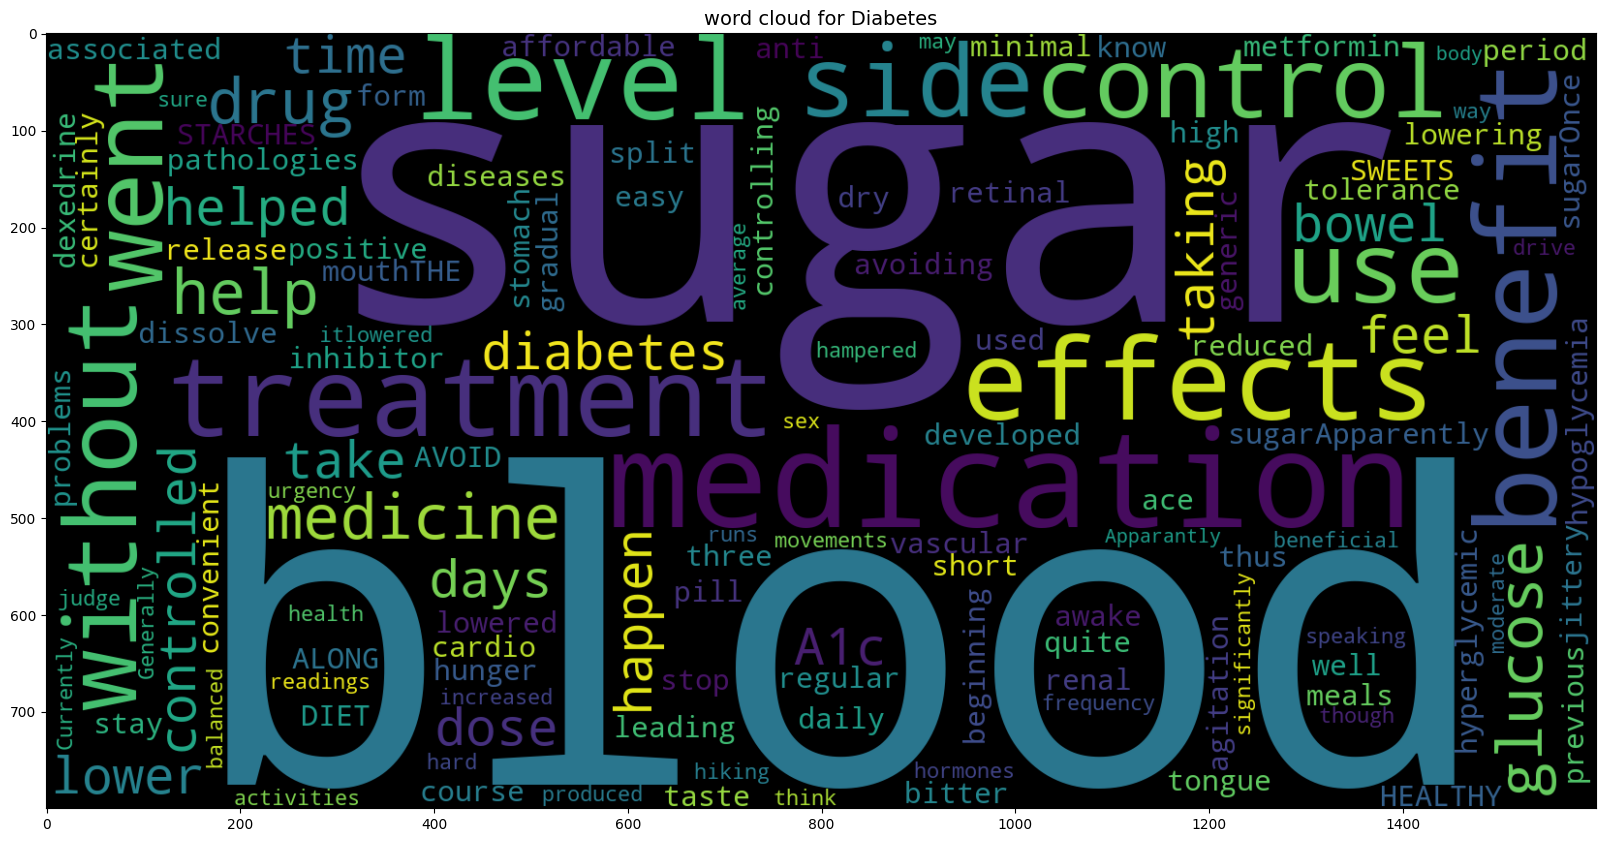

In [41]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=500, width=1600, height=800).generate("".join(X_diab.benefitsReview.dropna().astype(str)))
plt.imshow(wc,interpolation='bilinear')
plt.title('word cloud for Diabetes',fontsize=14)

DATA PREPROCESSING

In [55]:
# Fix accessing specific rows
#print(X.iloc[2]['benefitsReview'])  # Use iloc instead of []
#print(X.iloc[11]['benefitsReview'])
X.iloc[2]['benefitsReview']  # Use iloc instead of []
X.iloc[11]['benefitsReview']

# Fix replacing characters in string columns only
for i, col in enumerate(X.columns):
    if X.iloc[:, i].dtype == "object":  # Apply only to string columns
        X.iloc[:, i] = X.iloc[:, i].astype(str).str.replace('"', '', regex=False)

# Fix column width display option
pd.set_option('max_colwidth', None)

# Display the first few rows
X.head()


condition  \
7      depression   
12     depression   
34     depression   
40     depression   
50  birth control   

                                                                                                                                                                                                                                                                                                             benefitsReview  \
7   Although this drug was originally prescribed for depression, it helped with sleeplessness. Therefore, I have continued to take it for that alone. While I still on occasion have problems falling asleep, I find I can combine it with Melatonin or Valerian. In 12 years, I haven't had to increase the elavil dosage.   
12                                                                                                                                                                                  I found that this drug helps significantly with my level of depression and monthly irritability that occurs around my menstrual cycles.   
34                                                          I have taken antidepressants for many years, and this is first that did not flip the switch on sexuality.  I no longer feel like I am looking out of a dark room.  I have more energy, feel more motivated, and overall function at a higher level than before.   
40                                                                                                                 relieves depression, helps other things such as sleep, dieting, exercise, relationships, responses to stimulous.  The cost is lower than other antidepressants which can be a help to those on a budget.   
50                                                                                                                                                                                                                                                                                 No undesired pregnancies, lighter period   

                                                                                                                                                                                                                                                                                 sideEffectsReview  \
7                                                                                                                                                                                                                                                                                            None.   
12                                                                                                                                                My sides effects were not noticeable and very mild.  I have noticed some lower libido while on Fluoxetine, but no other noticeable side effects.   
34  A little bit of hyper feelings.  I take the entire dose at one time, daily, and have been advised that the feeling of being revved up would disspiate if I did take it in two or more doses during the day.  I try to minimize the effect by taking the medication first thing in the morning.   
40                                                                                                                                                Sleepy and lack of response to problems.  Took too long to get started.  I think anyone else would think it wasn't effective and stop taking it.   
50                                                                                                                                                                                                                                                                                            none   

                                                                                                                                                                                                         

condition  \
7      depression   
12     depression   
34     depression   
40     depression   
50  birth control   

                                                                                                                                                                                                                                                                                                             benefitsReview  \
7   Although this drug was originally prescribed for depression, it helped with sleeplessness. Therefore, I have continued to take it for that alone. While I still on occasion have problems falling asleep, I find I can combine it with Melatonin or Valerian. In 12 years, I haven't had to increase the elavil dosage.   
12                                                                                                                                                                                  I found that this drug helps significantly with my level of depression and monthly irritability that occurs around my menstrual cycles.   
34                                                          I have taken antidepressants for many years, and this is first that did not flip the switch on sexuality.  I no longer feel like I am looking out of a dark room.  I have more energy, feel more motivated, and overall function at a higher level than before.   
40                                                                                                                 relieves depression, helps other things such as sleep, dieting, exercise, relationships, responses to stimulous.  The cost is lower than other antidepressants which can be a help to those on a budget.   
50                                                                                                                                                                                                                                                                                 No undesired pregnancies, lighter period   

                                                                                                                                                                                                                                                                                 sideEffectsReview  \
7                                                                                                                                                                                                                                                                                            None.   
12                                                                                                                                                My sides effects were not noticeable and very mild.  I have noticed some lower libido while on Fluoxetine, but no other noticeable side effects.   
34  A little bit of hyper feelings.  I take the entire dose at one time, daily, and have been advised that the feeling of being revved up would disspiate if I did take it in two or more doses during the day.  I try to minimize the effect by taking the medication first thing in the morning.   
40                                                                                                                                                Sleepy and lack of response to problems.  Took too long to get started.  I think anyone else would think it wasn't effective and stop taking it.   
50                                                                                                                                                                                                                                                                                            none   

                                                                                                                                                                                                         